# Inclinations and trajectories

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Total-center-of-mass-(CoM)" data-toc-modified-id="Total-center-of-mass-(CoM)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Total center of mass (CoM)</a></span></li><li><span><a href="#Rotations-to-X',-Y',-Z'-coordinate-system" data-toc-modified-id="Rotations-to-X',-Y',-Z'-coordinate-system-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Rotations to X', Y', Z' coordinate system</a></span></li><li><span><a href="#Center-and-rotate-coordinates-for-each-galaxy" data-toc-modified-id="Center-and-rotate-coordinates-for-each-galaxy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Center and rotate coordinates for each galaxy</a></span></li><li><span><a href="#Rotate-in-X',Y'-plane" data-toc-modified-id="Rotate-in-X',Y'-plane-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Rotate in X',Y' plane</a></span></li><li><span><a href="#Plot-trajectories-over-12-Gyr" data-toc-modified-id="Plot-trajectories-over-12-Gyr-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plot trajectories over 12 Gyr</a></span></li><li><span><a href="#Inclinations-of-galaxy-rotations" data-toc-modified-id="Inclinations-of-galaxy-rotations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Inclinations of galaxy rotations</a></span></li><li><span><a href="#Mutual-inclination-of-galaxy-rotations" data-toc-modified-id="Mutual-inclination-of-galaxy-rotations-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Mutual inclination of galaxy rotations</a></span></li></ul></div>

## Setup

In [1]:
# import modules
import numpy as np
from numpy.linalg import norm
import astropy.units as u
from astropy.constants import G
from numpy.linalg import norm

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

%matplotlib inline

from galaxy.timecourse import TimeCourse
from galaxy.utilities import rotation_matrix_to_vector, z_rotation_matrix

In [2]:
tc = TimeCourse()

## Total center of mass (CoM)

These values will define the origin of the X',Y',Z' coordinate system at each time point

In [3]:
# position to center on
tot = tc.read_total_com_db()
total_com = np.array([tot[xi] for xi in ('x','y','z')])

# times for plotting
t = tot['t']

## Rotations to X', Y', Z' coordinate system

Assuming the coordinates already have the overall CoM at the origin, rotate the axes so that all three galaxy CoMs start in the X', Y' plane and the two large galaxies start on the X'-axis.

Start with a rotation matrix that puts the normal along the Z'-axis.

In [4]:
normal = tc.read_normals_db([0,0])
normal_t0 = np.array([normal[xi] for xi in ('x_hat','y_hat','z_hat')]).T[0]

In [5]:
R = rotation_matrix_to_vector(normal_t0)
R

array([[-0.62548793, -0.29492924, -0.722     ],
       [-0.29492924,  0.94648791, -0.131     ],
       [ 0.722     ,  0.131     , -0.67900002]])

## Center and rotate coordinates for each galaxy

In [6]:
MW = tc.read_com_db('MW')
MW_original = np.array([MW[xi] for xi in ('x','y','z')])
MW_centered = MW_original - total_com
MW_rotated = R @ MW_centered

In [7]:
M31 = tc.read_com_db('M31')
M31_original = np.array([M31[xi] for xi in ('x','y','z')])
M31_centered = M31_original - total_com
M31_rotated = R @ M31_centered

In [8]:
M33 = tc.read_com_db('M33')
M33_original = np.array([M33[xi] for xi in ('x','y','z')])
M33_centered = M33_original - total_com
M33_rotated = R @ M33_centered

## Rotate in X',Y' plane

In [9]:
R_z = z_rotation_matrix(MW_rotated[:2,0], M31_rotated[:2,0])
R_z

-70.22510616546326


array([[-0.33832561, -0.94102911, -0.        ],
       [ 0.94102911, -0.33832561, -0.        ],
       [-0.        , -0.        , -1.        ]])

In [10]:
MW_rotated = R_z @ MW_rotated
M31_rotated = R_z @ M31_rotated
M33_rotated = R_z @ M33_rotated

## Plot trajectories over 12 Gyr

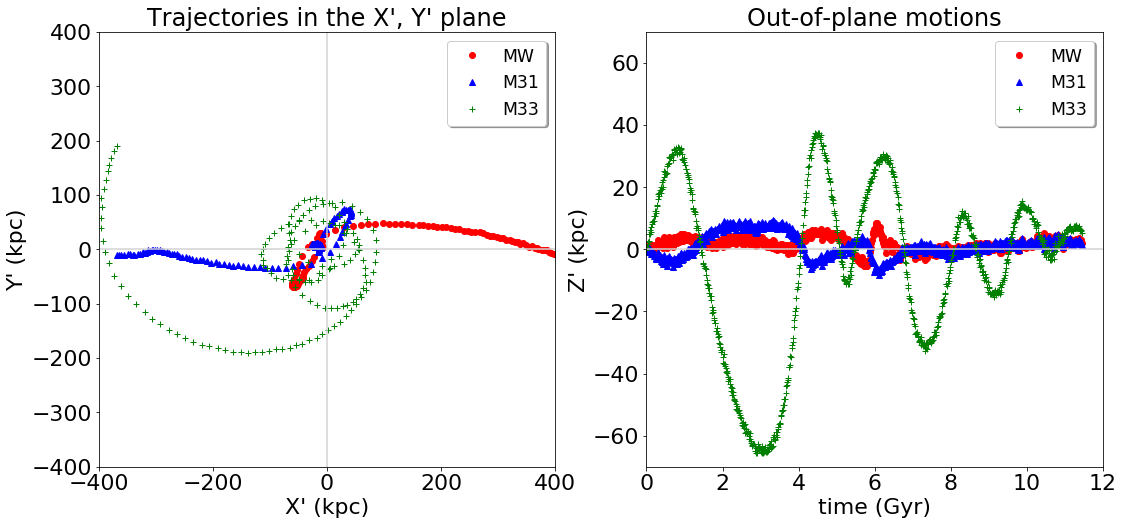

In [15]:
fig = plt.figure(figsize=(18,8))
subplots = (121, 122)

# set up the left subplot
ax0 = plt.subplot(121)

# add the curves
n = 5 # plot every n'th time point
ax0.plot(MW_rotated[0][::n], MW_rotated[1][::n], 'ro', label='MW')
ax0.plot(M31_rotated[0][::n], M31_rotated[1][::n], 'b^', label='M31')
ax0.plot(M33_rotated[0][::n], M33_rotated[1][::n], 'g+', label='M33')

ax0.plot((-400,400), (0,0), color='lightgray')
ax0.plot((0,0), (-400,400), color='lightgray')

ax0.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax0.set_xlabel("X' (kpc)", fontsize=22)
ax0.set_ylabel("Y' (kpc)", fontsize=22)

ax0.set_title("Trajectories in the X', Y' plane", fontsize=24)

#set axis limits
ax0.set_xlim(-400,400)
ax0.set_ylim(-400,400)

# set up the right subplot
ax1 = plt.subplot(122)

# add the curves
ax1.plot(t, MW_rotated[2], 'ro', label='MW')
ax1.plot(t, M31_rotated[2], 'b^', label='M31')
ax1.plot(t, M33_rotated[2], 'g+', label='M33')

ax1.plot((0, 12), (0,0), color='lightgray')

ax1.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax1.set_xlabel("time (Gyr)", fontsize=22)
ax1.set_ylabel("Z' (kpc)", fontsize=22)

ax1.set_title("Out-of-plane motions", fontsize=24)

#set axis limits
ax1.set_xlim(0,12)
ax1.set_ylim(-70, 70)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('trajectories.pdf', rasterized=True, dpi=350);

## Inclinations of galaxy rotations

First define a couple of functions to calculate angles:

In [71]:
def inclination_angle_to_plane(L_1):
    L_hat_1 = np.array([L_1[xi] for xi in ('x_hat','y_hat','z_hat')])
    thetas = np.arccos(np.dot(normal_t0, L_hat_1)) * 180 / np.pi # to degrees
    return thetas

In [93]:
def mutual_inclination_angles(L_1, L_2):
    L_hat_1 = np.array([L_1[xi] for xi in ('x_hat','y_hat','z_hat')])
    L_hat_2 = np.array([L_2[xi] for xi in ('x_hat','y_hat','z_hat')])
    dots = np.array([np.dot(L_hat_1[:,i], L_hat_2[:,i]) for i in range(L_hat_1.shape[1])])
    thetas = np.arccos(dots) * 180 / np.pi # to degrees
    return thetas

Do the calculations:

In [100]:
# Angles of angular momentum vection to plane normal
L_MW = tc.read_angmom_db('MW')
theta_MW = inclination_angle_to_plane(L_MW)
L_M31 = tc.read_angmom_db('M31')
theta_M31 = inclination_angle_to_plane(L_M31)
L_M33 = tc.read_angmom_db('M33')
theta_M33 = inclination_angle_to_plane(L_M33)

# angles between pairs of galaxies
theta_MW_M31 = mutual_inclination_angles(L_MW, L_M31)
theta_M33_M31 = mutual_inclination_angles(L_M33, L_M31)

Plots:

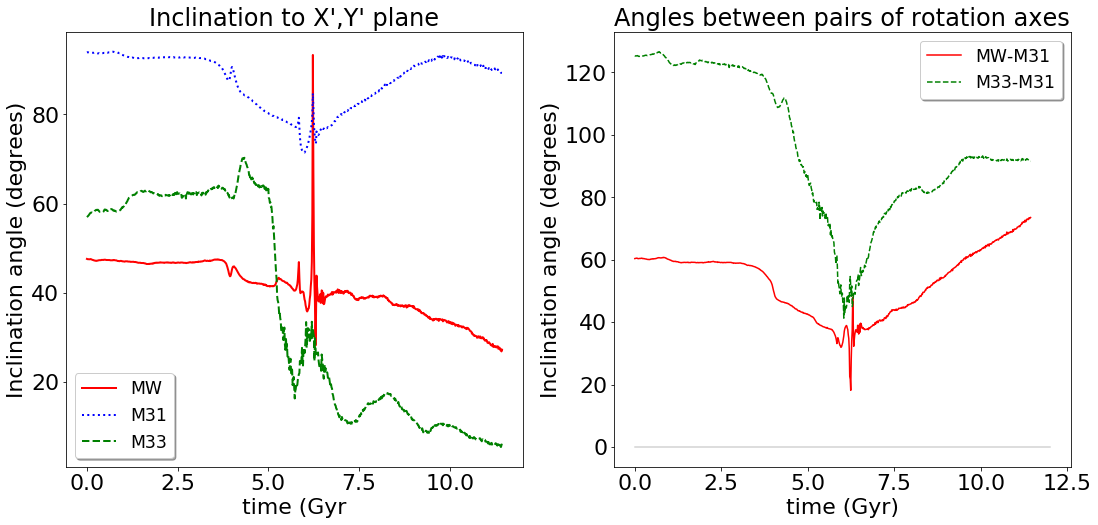

In [101]:
fig = plt.figure(figsize=(18,8))
subplots = (121, 122)

# set up the left subplot
ax0 = plt.subplot(121)

# add the curves
# n = 5 # plot every n'th time point
ax0.plot(t, theta_MW, 'r-', label='MW', lw=2)
ax0.plot(t, theta_M31, 'b:', label='M31', lw=2)
ax0.plot(t, theta_M33, 'g--', label='M33', lw=2)

ax0.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax0.set_xlabel("time (Gyr", fontsize=22)
ax0.set_ylabel("Inclination angle (degrees)", fontsize=22)

ax0.set_title("Inclination to X',Y' plane", fontsize=24)

# set up the right subplot
ax1 = plt.subplot(122)

# add the curves
ax1.plot(t, theta_MW_M31, 'r-', label='MW-M31')
ax1.plot(t, theta_M33_M31, 'g--', label='M33-M31')

ax1.plot((0, 12), (0,0), color='lightgray')

ax1.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax1.set_xlabel("time (Gyr)", fontsize=22)
ax1.set_ylabel("Inclination angle (degrees)", fontsize=22)

ax1.set_title("Angles between pairs of rotation axes", fontsize=24)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# plt.savefig('trajectories.pdf', rasterized=True, dpi=350);